<a href="https://colab.research.google.com/github/JParraArias/SignalsAndSystems2024-2/blob/main/ACTIVIDAD_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualicen la señal EEG en el tiempo y describan cómo el ruido afecta la detección de patrones Theta/Beta.**

★ Reflexionen sobre la necesidad de aplicar filtros digitales para mejorar la calidad del análisis.

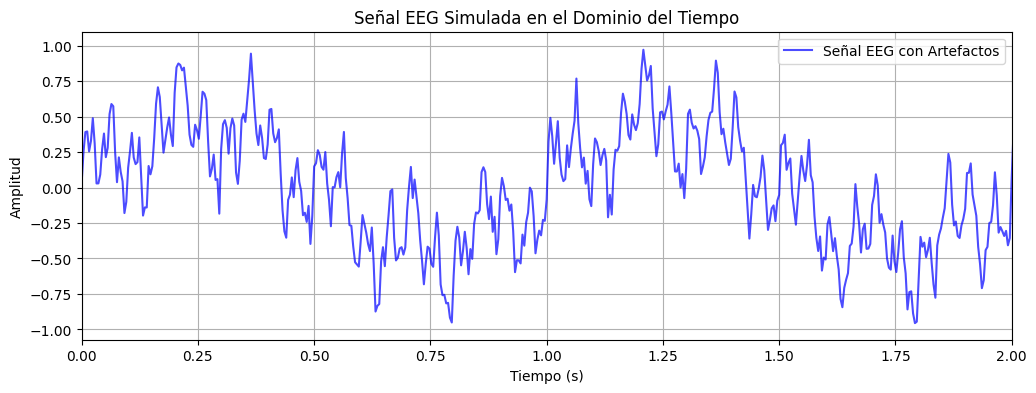

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fftpack import fft, fftfreq

# Parámetros de la señal EEG
fs = 250  # Frecuencia de muestreo en Hz
t = np.arange(0, 10, 1/fs)  # Vector de tiempo de 10 segundos

# Generación de señales EEG simuladas con artefactos
np.random.seed(42)
theta_wave = np.sin(2 * np.pi * 6 * t)  # Onda Theta (6 Hz) - Asociada con estados de relajación y concentración ligera
beta_wave = np.sin(2 * np.pi * 20 * t)  # Onda Beta (20 Hz) - Relacionada con actividad cognitiva y atención
muscle_noise = 0.5 * np.sin(2 * np.pi * 50 * t)  # Ruido muscular (50 Hz) - Interferencia proveniente de movimientos musculares
eye_blink = 2 * np.sin(2 * np.pi * 1 * t)  # Artefacto de parpadeo (1 Hz) - Ocurre por movimientos oculares
random_noise = 0.3 * np.random.randn(len(t))  # Ruido aleatorio - Simula interferencias externas

# Señal EEG simulada con artefactos
eeg_signal = theta_wave + beta_wave + muscle_noise + eye_blink + random_noise

# Normalización de la señal EEG (opcional, mejora la comparación entre señales)
eeg_signal = eeg_signal / np.max(np.abs(eeg_signal))  # Escala la señal entre -1 y 1 para evitar valores extremos

# Visualización de la señal en el dominio del tiempo
plt.figure(figsize=(12, 4))
plt.plot(t, eeg_signal, label="Señal EEG con Artefactos", color='blue', alpha=0.7)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal EEG Simulada en el Dominio del Tiempo")
plt.legend()
plt.grid(True)  # Mejora la visualización con líneas de referencia en el fondo
plt.xlim(0, 2)  # Muestra solo los primeros 2 segundos para ver detalles de las oscilaciones
plt.show()


# **Identifiquen las frecuencias que dominan la señal y evalúen cómo pueden filtrarse los artefactos sin perder información relevante.**

★ Determinen cómo ajustar un filtro digital para mejorar la relación Theta/Beta en la interpretación de la atención.

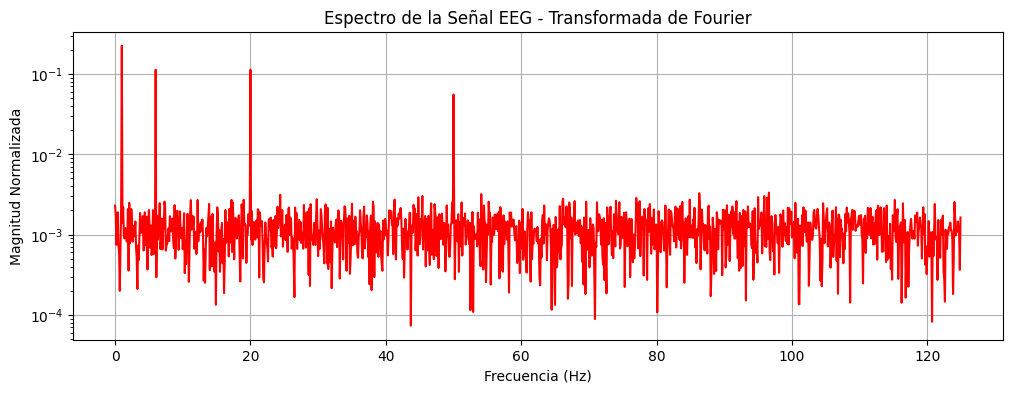

In [6]:
# Aplicación de la Transformada de Fourier
fft_eeg = fft(eeg_signal)
freqs = fftfreq(len(t), d=1/fs)

# Solo tomamos la parte positiva del espectro
freqs = freqs[:len(freqs)//2]
fft_eeg = np.abs(fft_eeg[:len(freqs)]) / len(t)  # Normalización para una mejor escala

# Visualización del espectro de frecuencia
plt.figure(figsize=(12, 4))
plt.semilogy(freqs, fft_eeg, color='red')  # Escala logarítmica para mejor visibilidad
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud Normalizada")
plt.title("Espectro de la Señal EEG - Transformada de Fourier")
plt.grid()
plt.show()


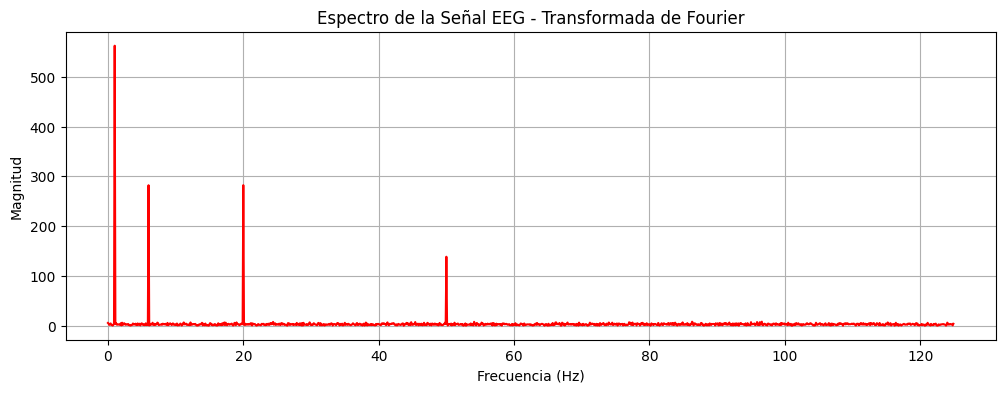

In [7]:
# Aplicación de la Transformada de Fourier
fft_eeg = fft(eeg_signal)
freqs = fftfreq(len(t), d=1/fs)

# Visualización del espectro de frecuencia
plt.figure(figsize=(12, 4))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_eeg[:len(freqs)//2]), color='red')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.title("Espectro de la Señal EEG - Transformada de Fourier")
plt.grid()
plt.show()

# **Ajusten los parámetros del filtro en tiempo real**

**★** Analicen su impacto en la señal EEG y comparen la señal antes y después del filtrado y evalúen la calidad de la información obtenida.

In [9]:
import ipywidgets as widgets
from IPython.display import display

# Función de filtrado digital
def bandpass_filter(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

def apply_filter(data, lowcut, highcut, fs, order=4):
    b, a = bandpass_filter(lowcut, highcut, fs, order=order)
    return signal.filtfilt(b, a, data)

# Filtros separados para Theta y Beta
theta_filtered = apply_filter(eeg_signal, 4, 7, fs)
beta_filtered = apply_filter(eeg_signal, 12, 30, fs)

# Sliders interactivos
lowcut_slider = widgets.FloatSlider(value=4, min=1, max=30, step=0.5, description="Frecuencia Baja")
highcut_slider = widgets.FloatSlider(value=8, min=5, max=40, step=0.5, description="Frecuencia Alta")

# Función interactiva
def update_plot(lowcut, highcut):
    if highcut - lowcut < 1:  # Evita rangos de frecuencia demasiado estrechos
        highcut = lowcut + 1

    eeg_filtered = apply_filter(eeg_signal, lowcut, highcut, fs)

    fig, axs = plt.subplots(3, 1, figsize=(12, 8))

    axs[0].plot(t, eeg_signal, label="Señal Original con Artefactos", color='blue', alpha=0.7)
    axs[0].set_title("Señal EEG con Artefactos")
    axs[0].legend()
    axs[0].grid(True)  # Mejora la visualización

    axs[1].plot(t, eeg_filtered, label=f"Señal Filtrada ({lowcut}-{highcut} Hz)", color='green')
    axs[1].set_title(f"Señal Filtrada ({lowcut}-{highcut} Hz)")
    axs[1].legend()
    axs[1].grid(True)

    axs[2].plot(t, eeg_signal, label="Señal Original", color='blue', alpha=0.5)
    axs[2].plot(t, eeg_filtered, label="Señal Filtrada", color='green', alpha=0.7)
    axs[2].set_title("Comparación Señal Original vs Filtrada")
    axs[2].legend()
    axs[2].grid(True)
    axs[2].set_xlim(0, 2)  # Enfoca los primeros 2 segundos para ver detalles

    plt.tight_layout()
    plt.show()

interactive_plot = widgets.interactive(update_plot, lowcut=lowcut_slider, highcut=highcut_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=4.0, description='Frecuencia Baja', max=30.0, min=1.0, step=0.5), Floa…

In [8]:
import ipywidgets as widgets
from IPython.display import display

# Función de filtrado digital
def bandpass_filter(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

def apply_filter(data, lowcut, highcut, fs, order=4):
    b, a = bandpass_filter(lowcut, highcut, fs, order=order)
    return signal.filtfilt(b, a, data)

    # Filtros separados para Theta y Beta
theta_filtered = apply_filter(eeg_signal, 4, 7, fs)
beta_filtered = apply_filter(eeg_signal, 12, 30, fs)

# Sliders interactivos
lowcut_slider = widgets.FloatSlider(value=4, min=1, max=30, step=0.5, description="Frecuencia Baja")
highcut_slider = widgets.FloatSlider(value=8, min=5, max=40, step=0.5, description="Frecuencia Alta")

# Función interactiva
def update_plot(lowcut, highcut):
    eeg_filtered = apply_filter(eeg_signal, lowcut, highcut, fs)

    fig, axs = plt.subplots(3, 1, figsize=(12, 8))

    axs[0].plot(t, eeg_signal, label="Señal Original con Artefactos", color='blue', alpha=0.7)
    axs[0].set_title("Señal EEG con Artefactos")
    axs[0].legend()

    axs[1].plot(t, eeg_filtered, label=f"Señal Filtrada ({lowcut}-{highcut} Hz)", color='green')
    axs[1].set_title(f"Señal Filtrada ({lowcut}-{highcut} Hz)")
    axs[1].legend()

    axs[2].plot(t, eeg_signal, label="Señal Original", color='blue', alpha=0.5)
    axs[2].plot(t, eeg_filtered, label="Señal Filtrada", color='green', alpha=0.7)
    axs[2].set_title("Comparación Señal Original vs Filtrada")
    axs[2].legend()

    plt.tight_layout()
    plt.show()

interactive_plot = widgets.interactive(update_plot, lowcut=lowcut_slider, highcut=highcut_slider)
display(interactive_plot)

interactive(children=(FloatSlider(value=4.0, description='Frecuencia Baja', max=30.0, min=1.0, step=0.5), Floa…

# **Observen el espectro de la señal antes y después del filtrado y analicen si se han eliminado los artefactos sin afectar las ondas Theta y Beta.**

★ Reflexionen sobre qué configuraciones del filtro proporcionan los mejores resultados en la detección de patrones de atención.

In [10]:
# Aplicación de la FFT a la señal filtrada
def plot_filtered_spectrum(lowcut, highcut):
    eeg_filtered = apply_filter(eeg_signal, lowcut, highcut, fs)
    fft_filtered = fft(eeg_filtered)

    # Definir frecuencias solo para la señal filtrada
    freqs_filtered = fftfreq(len(eeg_filtered), d=1/fs)[:len(eeg_filtered)//2]

    # Normalización para mejorar la comparación
    fft_filtered = np.abs(fft_filtered[:len(freqs_filtered)]) / len(eeg_filtered)
    fft_eeg_norm = np.abs(fft_eeg[:len(freqs_filtered)]) / len(eeg_signal)

    fig, axs = plt.subplots(2, 1, figsize=(12, 8))

    # Espectro antes del filtrado
    axs[0].semilogy(freqs_filtered, fft_eeg_norm, color='red', label="Antes del Filtrado")
    axs[0].set_xlabel("Frecuencia (Hz)")
    axs[0].set_ylabel("Magnitud Normalizada")
    axs[0].set_title("Espectro de la Señal EEG antes del Filtrado")
    axs[0].legend()
    axs[0].grid()

    # Espectro después del filtrado
    axs[1].semilogy(freqs_filtered, fft_filtered, color='green', label="Después del Filtrado")
    axs[1].set_xlabel("Frecuencia (Hz)")
    axs[1].set_ylabel("Magnitud Normalizada")
    axs[1].set_title("Espectro de la Señal EEG después del Filtrado")
    axs[1].legend()
    axs[1].grid()

    plt.tight_layout()
    plt.show()

# Interacción en Google Colab
interactive_spectrum = widgets.interactive(plot_filtered_spectrum, lowcut=lowcut_slider, highcut=highcut_slider)
display(interactive_spectrum)


interactive(children=(FloatSlider(value=28.5, description='Frecuencia Baja', max=30.0, min=1.0, step=0.5), Flo…

In [4]:
# Aplicación de la FFT a la señal filtrada
def plot_filtered_spectrum(lowcut, highcut):
    eeg_filtered = apply_filter(eeg_signal, lowcut, highcut, fs)
    fft_filtered = fft(eeg_filtered)

    fig, axs = plt.subplots(2, 1, figsize=(12, 8))

    # Espectro antes del filtrado
    axs[0].plot(freqs[:len(freqs)//2], np.abs(fft_eeg[:len(freqs)//2]), color='red', label="Antes del Filtrado")
    axs[0].set_xlabel("Frecuencia (Hz)")
    axs[0].set_ylabel("Magnitud")
    axs[0].set_title("Espectro de la Señal EEG antes del Filtrado")
    axs[0].legend()
    axs[0].grid()

    # Espectro después del filtrado
    axs[1].plot(freqs[:len(freqs)//2], np.abs(fft_filtered[:len(freqs)//2]), color='green', label="Después del Filtrado")
    axs[1].set_xlabel("Frecuencia (Hz)")
    axs[1].set_ylabel("Magnitud")
    axs[1].set_title("Espectro de la Señal EEG después del Filtrado")
    axs[1].legend()
    axs[1].grid()

    plt.tight_layout()
    plt.show()

# Interacción en Google Colab
interactive_spectrum = widgets.interactive(plot_filtered_spectrum, lowcut=lowcut_slider, highcut=highcut_slider)
display(interactive_spectrum)

interactive(children=(FloatSlider(value=4.0, description='Frecuencia Baja', max=30.0, min=1.0, step=0.5), Floa…